In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-growth-data-classification/plant_growth_data.csv


Dataset "Klasifikasi Data Pertumbuhan Tanaman" ini biasanya melibatkan tugas prediksi atau klasifikasi tahap pertumbuhan tanaman berdasarkan faktor lingkungan dan pengelolaan yang disediakan. Secara khusus, Anda akan bertujuan untuk memprediksi tahap pertumbuhan atau pencapaian yang dicapai oleh tanaman berdasarkan variabel seperti jenis tanah, durasi sinar matahari, frekuensi penyiraman, jenis pupuk, suhu, dan kelembaban. Prediksi ini dapat membantu memahami bagaimana kondisi yang berbeda mempengaruhi pertumbuhan tanaman dan dapat berguna untuk mengoptimalkan praktik pertanian atau manajemen rumah kaca.

**deskripsi dari kolom:**

1. Soil_Type (Jenis_Tanah): Jenis atau komposisi tanah tempat tanaman ditanam.

2. Sunlight_Hours (Durasi_Sinar_Matahari): Durasi atau intensitas paparan sinar matahari yang diterima oleh tanaman.

3. Water_Frequency (Frekuensi_Penyiraman): Seberapa sering tanaman disiram, menunjukkan jadwal penyiraman.

4. Fertilizer_Type (Jenis_Pupuk): Jenis pupuk yang digunakan untuk memberikan nutrisi pada tanaman.

5. Temperature (Suhu): Kondisi suhu lingkungan tempat tanaman tumbuh.

6. Humidity (Kelembaban): Tingkat kelembaban atau kandungan air di lingkungan sekitar tanaman.

7. Growth_Milestone (Tahap_Pertumbuhan): Deskripsi atau penanda yang menunjukkan tahap atau kejadian penting dalam proses pertumbuhan tanaman.

**Maksud dan Tujuan:**

Tujuan dari dataset ini adalah untuk memungkinkan prediksi atau klasifikasi tahap pertumbuhan tanaman berdasarkan berbagai faktor lingkungan dan pengelolaan. Dengan memahami bagaimana variabel-variabel seperti jenis tanah, durasi sinar matahari, frekuensi penyiraman, jenis pupuk, suhu, dan kelembaban mempengaruhi pertumbuhan tanaman, kita dapat mengoptimalkan praktik pertanian atau manajemen rumah kaca. Misalnya, dengan mengetahui kombinasi kondisi yang ideal, kita dapat meningkatkan efisiensi produksi tanaman dan kesehatan tanaman secara keseluruhan.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("/kaggle/input/plant-growth-data-classification/plant_growth_data.csv")
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [5]:
df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [6]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}") 
print(f"missing data: {sum(df.isna().sum())}")

Rows: 193, Columns: 7
Duplicates: 0
missing data: 0


In [7]:
df = df.rename(columns={'Soil_Type': 'Jenis_Tanah'})
df = df.rename(columns={'Sunlight_Hours': 'Durasi_Sinar_Matahari'})
df = df.rename(columns={'Water_Frequency': 'Frekuensi_Penyiraman'})
df = df.rename(columns={'Fertilizer_Type': 'Jenis_Pupuk'})
df = df.rename(columns={'Temperature': 'Suhu'})
df = df.rename(columns={'Humidity': 'Kelembaban'})
df = df.rename(columns={'Growth_Milestone': 'Tahap_Pertumbuhan'})
df


,Jenis_Tanah,Durasi_Sinar_Matahari,Frekuensi_Penyiraman,Jenis_Pupuk,Suhu,Kelembaban,Tahap_Pertumbuhan
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [8]:
df['Jenis_Tanah'].value_counts()

Jenis_Tanah
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [9]:
df['Frekuensi_Penyiraman'].value_counts()

Frekuensi_Penyiraman
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [10]:
df['Jenis_Pupuk'].value_counts()

Jenis_Pupuk
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [11]:
df.tail()

,Jenis_Tanah,Durasi_Sinar_Matahari,Frekuensi_Penyiraman,Jenis_Pupuk,Suhu,Kelembaban,Tahap_Pertumbuhan
188,sandy,5.652,daily,none,28.0,70.2,0
189,clay,7.528,weekly,chemical,30.5,60.1,1
190,loam,4.934,bi-weekly,none,24.5,61.7,0
191,sandy,8.273,daily,organic,27.9,69.5,1
192,clay,6.732,weekly,none,21.7,56.9,0


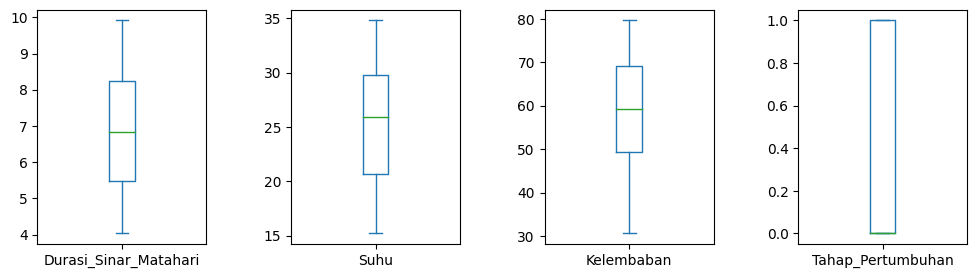

In [12]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5); 


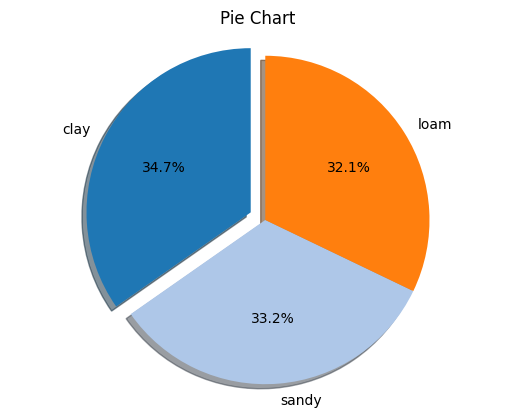

In [13]:
#presentase antar brand yang tersedia dapat dilihat dibawah ini
df_piechart = df['Jenis_Tanah'].value_counts()

labels = df_piechart.index
quantity = df_piechart.values
colors = plt.cm.tab20(range(len(labels)))
explode = (0.1, 0, 0)

plt.title('Pie Chart')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

plt.axis('equal')
plt.show()

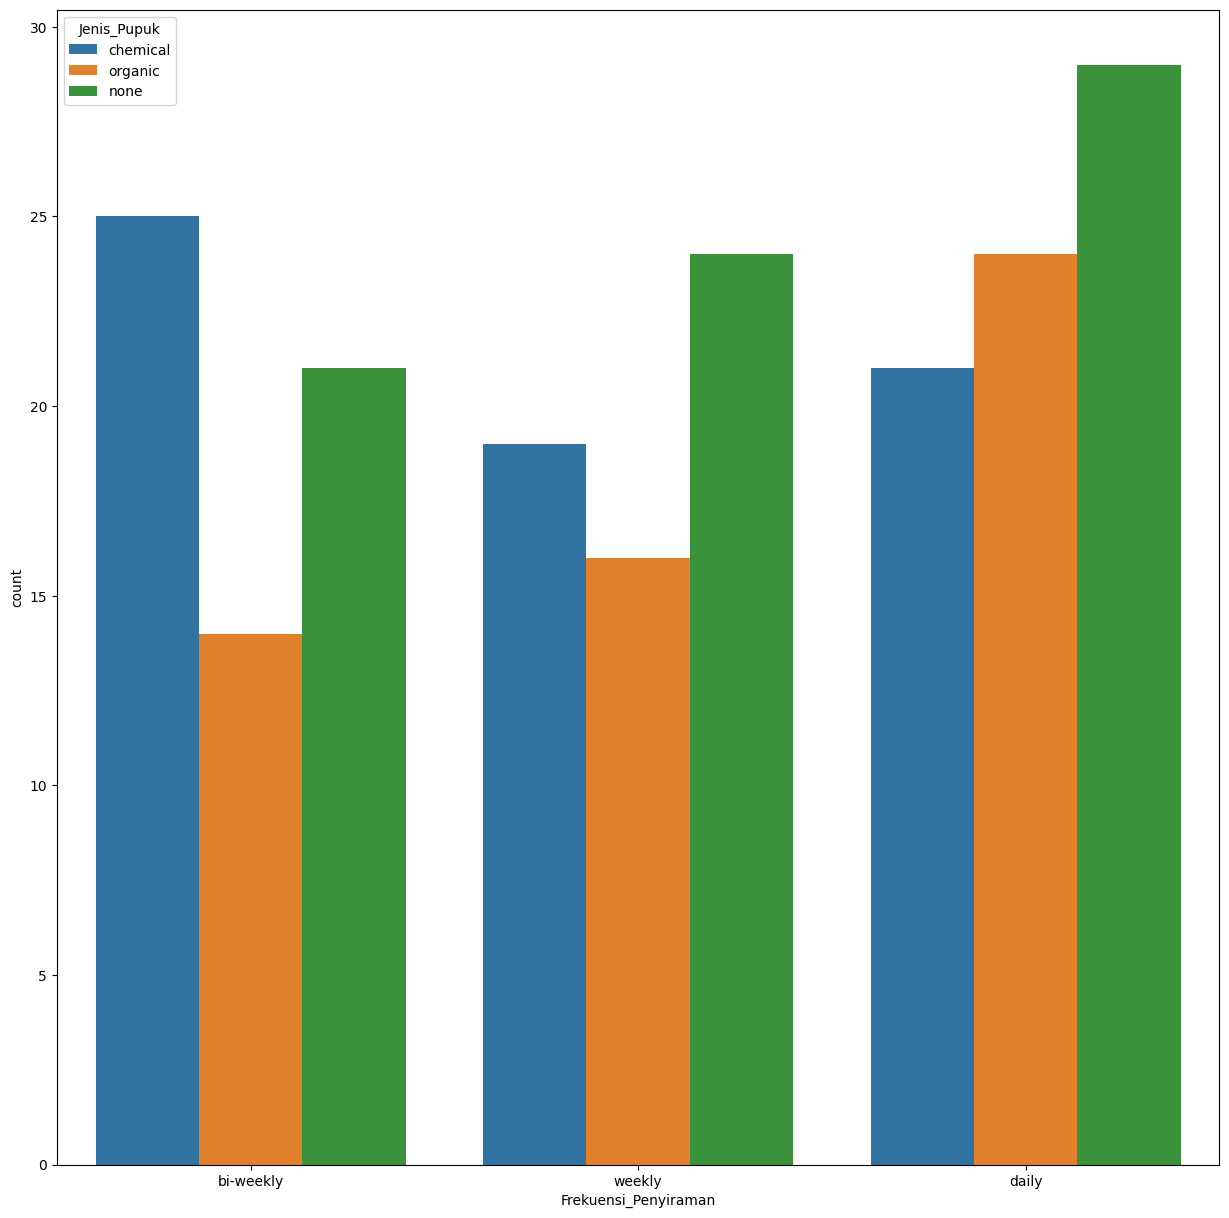

In [14]:
#membuat diagram batang untuk perbandingan
plt.figure(figsize=(15,15))
sns.countplot(data=df, x="Frekuensi_Penyiraman", hue="Jenis_Pupuk")
plt.show()

In [15]:
import plotly.express as px
fig = px.scatter_3d(df, x='Durasi_Sinar_Matahari', y='Suhu', z='Kelembaban', color='Jenis_Tanah', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [16]:
df

,Jenis_Tanah,Durasi_Sinar_Matahari,Frekuensi_Penyiraman,Jenis_Pupuk,Suhu,Kelembaban,Tahap_Pertumbuhan
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping1 = {'clay':0,'sandy':1,'loam':2}
mapping2 = {'daily':0,'bi-weekly':1,'weekly':2}
mapping3 = {'none':0,'chemical':1,'organic':2}
df['Jenis_Tanah'] = le.fit_transform(df['Jenis_Tanah'].map(mapping1))
df['Frekuensi_Penyiraman'] = le.fit_transform(df['Frekuensi_Penyiraman'].map(mapping2))
df['Jenis_Pupuk'] = le.fit_transform(df['Jenis_Pupuk'].map(mapping3))
df

,Jenis_Tanah,Durasi_Sinar_Matahari,Frekuensi_Penyiraman,Jenis_Pupuk,Suhu,Kelembaban,Tahap_Pertumbuhan
0,2,5.192294,1,1,31.719602,61.591861,0
1,1,4.033133,2,2,28.919484,52.422276,1
2,2,8.892769,1,0,23.179059,44.660539,0
3,2,8.241144,1,0,18.465886,46.433227,0
4,1,8.374043,1,2,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,1,5.652000,0,0,28.000000,70.200000,0
189,0,7.528000,2,1,30.500000,60.100000,1
190,2,4.934000,1,0,24.500000,61.700000,0
191,1,8.273000,0,2,27.900000,69.500000,1


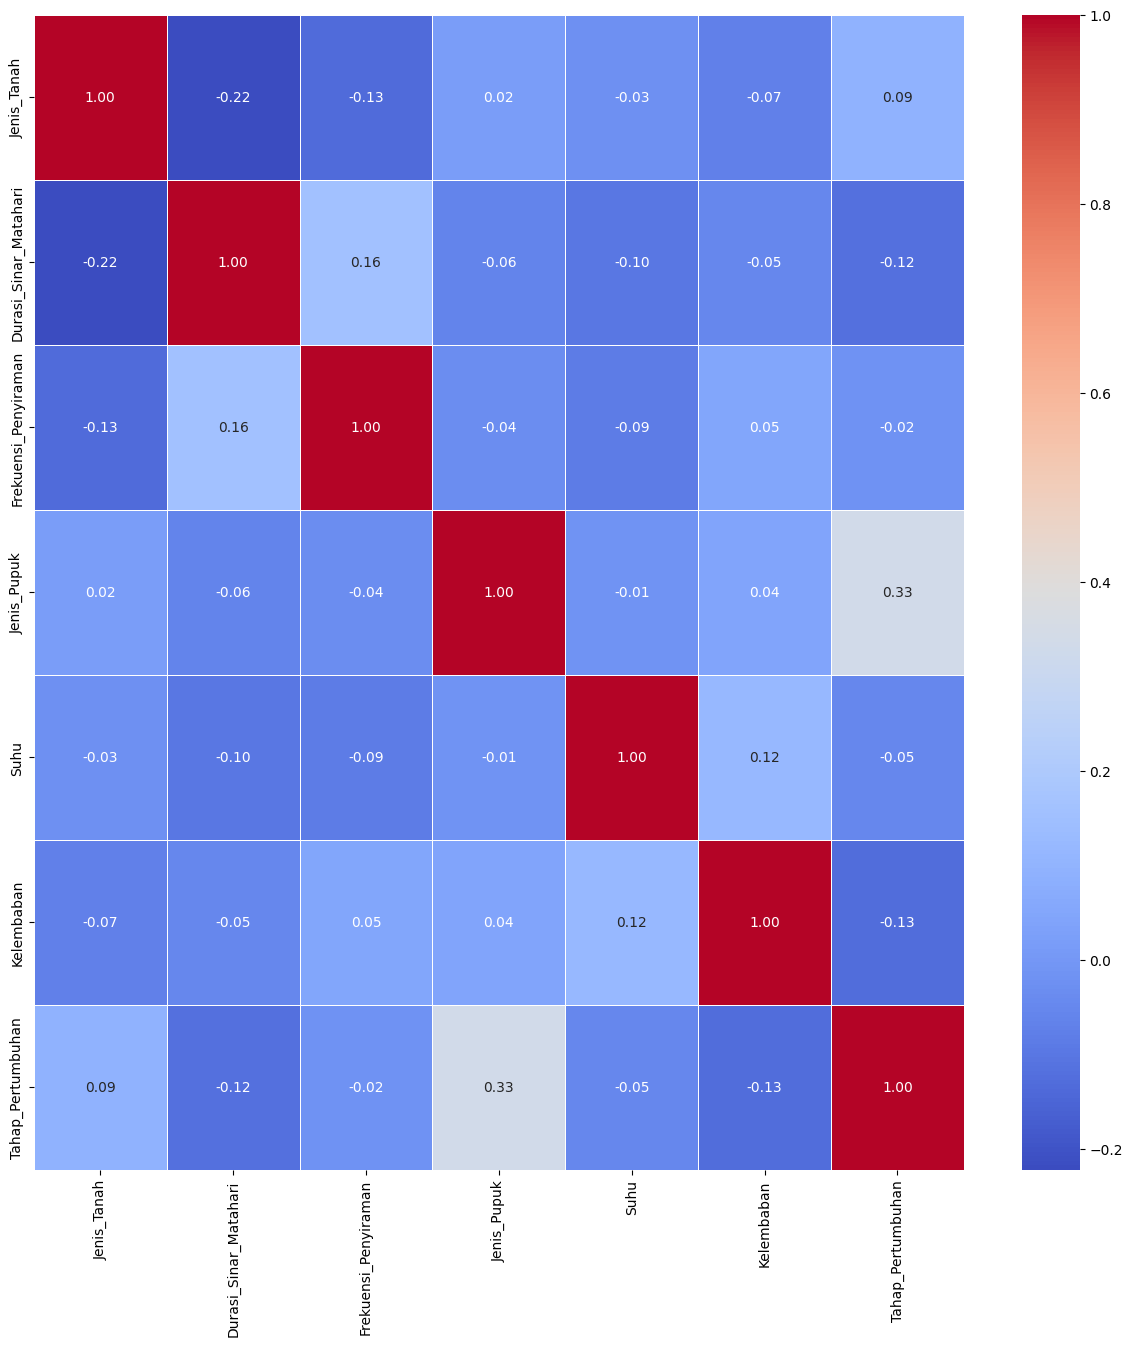

In [18]:
import matplotlib.pyplot as plt #korelasi hubungan antar variabel dapat dilihat dari korelasi di bawah
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [19]:
import scipy
from scipy import stats

kolom=len(df.columns)
z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df.iloc[:,i],df.iloc[:,-1])
  z.append([i,df.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,3,Jenis_Pupuk,0.332892
1,5,Kelembaban,0.130328
2,1,Durasi_Sinar_Matahari,0.122212
3,0,Jenis_Tanah,0.094949
4,4,Suhu,0.053577
5,2,Frekuensi_Penyiraman,0.019295


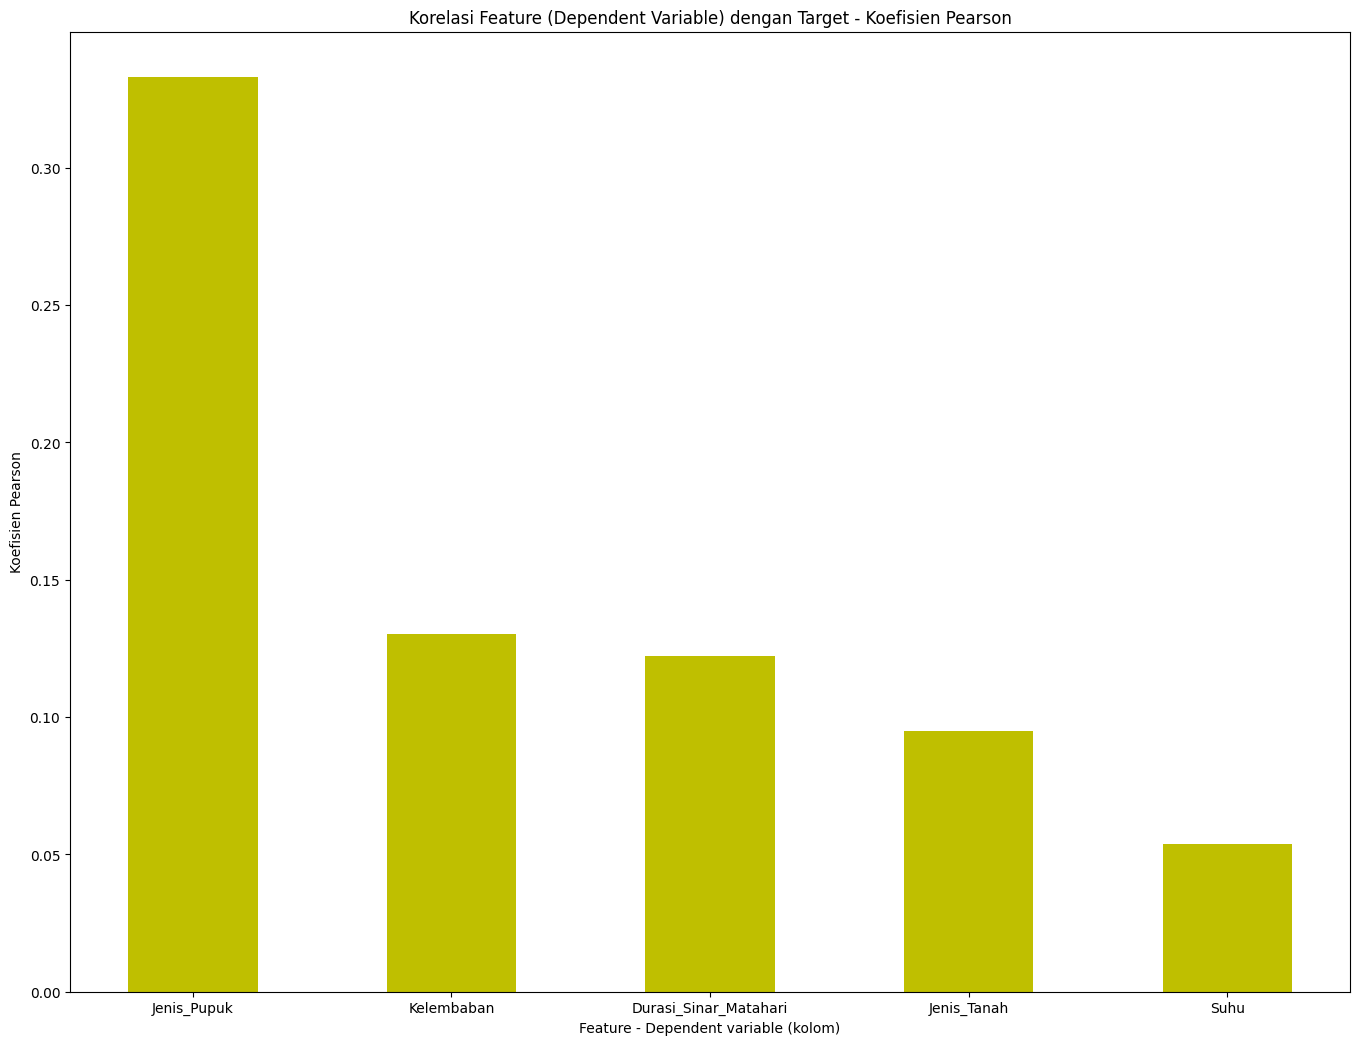

In [20]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

# TRAIN TEST SPLIT

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

# DECISION TREE

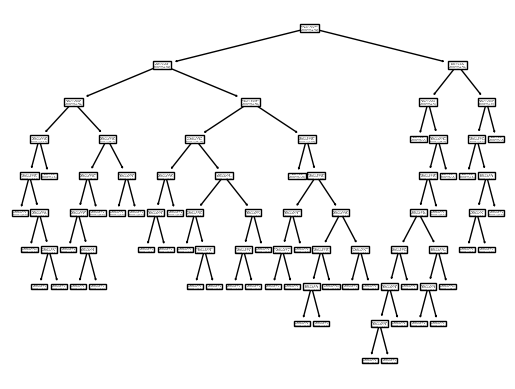

In [22]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
tree.plot_tree(clf)
zeroes = 0
ones=0


In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)

In [24]:
scores1 = cross_val_score(clf, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[0.45       0.7        0.65       0.78947368 0.73684211 0.52631579
 0.63157895 0.42105263 0.42105263 0.57894737]
rata rata KFold nya adalah:  0.5905263157894737


In [25]:
prediksi1 = clf.predict(x_test)
prediksi1

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  48.717948717948715 %


In [27]:
accuracy_Decision_rep = accuracy_score(y_test, prediksi1)
classification_rep_Decision = classification_report(y_test, prediksi1)

print(f'Accuracy: {accuracy_Decision_rep}')
print(f'Classification Report:\n{classification_rep_Decision}')

Accuracy: 0.48717948717948717
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.37      0.41        19
           1       0.50      0.60      0.55        20

    accuracy                           0.49        39
   macro avg       0.48      0.48      0.48        39
weighted avg       0.48      0.49      0.48        39



# LOGISTIC REGRESSION

In [28]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [29]:
scores2 = cross_val_score(classifier, x, y, cv=kf)
print(scores2)
print('rata rata KFold nya adalah: ',scores2.mean())

[0.6        0.65       0.65       0.68421053 0.52631579 0.47368421
 0.47368421 0.68421053 0.68421053 0.68421053]
rata rata KFold nya adalah:  0.6110526315789474


In [30]:
y_predlog = classifier.predict(x_test)
y_predlog

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [31]:
accuracylog = accuracy_score(y_test, y_predlog)
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')

Akurasi menggunkan algoritma logistic Regression adalah : 61.53846153846154 %


In [32]:
accuracy_LOG_rep = accuracy_score(y_test, y_predlog)
classification_rep_LOG = classification_report(y_test, y_predlog)

print(f'Accuracy: {accuracy_LOG_rep}')
print(f'Classification Report:\n{classification_rep_LOG}')

Accuracy: 0.6153846153846154
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.63      0.60      0.62        20

    accuracy                           0.62        39
   macro avg       0.62      0.62      0.62        39
weighted avg       0.62      0.62      0.62        39



# NAIVE BAYES

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_prednaive = nb.predict(x_test)
y_prednaive

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [34]:
scores3 = cross_val_score(nb, x, y, cv=kf)
print(scores3)
print('rata rata KFold nya adalah: ',scores3.mean())

[0.8        0.55       0.55       0.57894737 0.68421053 0.42105263
 0.78947368 0.42105263 0.47368421 0.63157895]
rata rata KFold nya adalah:  0.5900000000000001


In [35]:
accuracynavie = accuracy_score(y_test, y_prednaive)
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')

Akurasi menggunakan algoritma naive bayes : 61.53846153846154 %


In [36]:
accuracy_Naive_rep = accuracy_score(y_test, y_prednaive)
classification_rep_Naive = classification_report(y_test, y_prednaive)

print(f'Accuracy: {accuracy_Naive_rep}')
print(f'Classification Report:\n{classification_rep_Naive}')

Accuracy: 0.6153846153846154
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        19
           1       0.65      0.55      0.59        20

    accuracy                           0.62        39
   macro avg       0.62      0.62      0.61        39
weighted avg       0.62      0.62      0.61        39



# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)
y_predknn

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [38]:
scores4 = cross_val_score(knn, x, y, cv=kf)
print(scores4)
print('rata rata KFold nya adalah: ',scores4.mean())

[0.4        0.55       0.55       0.47368421 0.63157895 0.63157895
 0.42105263 0.36842105 0.47368421 0.36842105]
rata rata KFold nya adalah:  0.48684210526315785


In [39]:
accuracyknn = accuracy_score(y_test, y_predknn)
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')

akurasi untuk penggunaan algoritma KNN adalah : 48.717948717948715 %


In [40]:
accuracy_KNN_rep = accuracy_score(y_test, y_predknn)
classification_rep_KNN = classification_report(y_test, y_predknn)

print(f'Accuracy: {accuracy_KNN_rep}')
print(f'Classification Report:\n{classification_rep_KNN}')

Accuracy: 0.48717948717948717
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.50      0.40      0.44        20

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.48        39
weighted avg       0.49      0.49      0.48        39



# LINEAR DESCRIMINANT ANALYSIST LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predLDA = lda.predict(x_test)
accuracyLDA = accuracy_score(y_test, y_predLDA)
y_predLDA

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [42]:
scores5 = cross_val_score(lda, x, y, cv=kf)
print(scores5)
print('rata rata KFold nya adalah: ',scores5.mean())

[0.9        0.75       0.65       0.68421053 0.57894737 0.63157895
 0.63157895 0.42105263 0.57894737 0.47368421]
rata rata KFold nya adalah:  0.63


In [43]:
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')

Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 64.1025641025641 %


In [44]:
accuracy_LDA_rep = accuracy_score(y_test, y_predLDA)
classification_rep_LDA = classification_report(y_test, y_predLDA)

print(f'Accuracy: {accuracy_LDA_rep}')
print(f'Classification Report:\n{classification_rep_LDA}')

Accuracy: 0.6410256410256411
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.67      0.60      0.63        20

    accuracy                           0.64        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.64      0.64      0.64        39



# EXTRA TRESS CLASIFIER

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
y_predETC = model.predict(x_test)
accuracyETC = accuracy_score(y_test, y_predETC)
y_predETC

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [46]:
scores6 = cross_val_score(model, x, y, cv=kf)
print(scores6)
print('rata rata nya adalah: ',scores6.mean())

[0.8        0.5        0.6        0.57894737 0.68421053 0.57894737
 0.68421053 0.52631579 0.57894737 0.68421053]
rata rata nya adalah:  0.6215789473684211


In [47]:
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')

Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 79.48717948717949 %


In [48]:
accuracy_ETC_rep = accuracy_score(y_test, y_predETC)
classification_rep_ETC = classification_report(y_test, y_predETC)

print(f'Accuracy: {accuracy_ETC_rep}')
print(f'Classification Report:\n{classification_rep_ETC}')

Accuracy: 0.7948717948717948
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.80      0.80      0.80        20

    accuracy                           0.79        39
   macro avg       0.79      0.79      0.79        39
weighted avg       0.79      0.79      0.79        39



# RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators = 25, random_state=2)
Random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=7, shuffle=True)

In [51]:
scores7 = cross_val_score(Random_forest, x, y, cv=kf)
print(scores7)
print('rata rata KFold nya adalah: ',scores7.mean())

[0.67857143 0.60714286 0.75       0.57142857 0.77777778 0.62962963
 0.48148148]
rata rata KFold nya adalah:  0.6422902494331065


In [52]:
forest_pred = Random_forest.predict(x_test)
forest_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [53]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(forest_pred,y_test)*100,'%')

Accuracy Score untuk algoritma Random Forest Adalah :  64.1025641025641 %


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy_Random_Forest = accuracy_score(y_test, forest_pred)
classification_rep = classification_report(y_test, forest_pred)

print(f'Accuracy: {accuracy_Random_Forest}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6410256410256411
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.62      0.75      0.68        20

    accuracy                           0.64        39
   macro avg       0.65      0.64      0.64        39
weighted avg       0.65      0.64      0.64        39



# KESIMPULAN DARI KESELURUHAN K FOLD

In [55]:
print('rata rata decision tree adalah: ',scores1.mean())
print('rata rata logistic regression adalah: ',scores2.mean())
print('rata rata naive bayes adalah: ',scores3.mean())
print('rata rata KNN adalah: ',scores4.mean())
print('rata rata Linear Discriminant Analysis adalah: ',scores5.mean())
print('rata rata ExtraTreesClassifier adalah: ',scores6.mean())
print('rata rata RandomForest nya adalah: ',scores7.mean())
print('=='*40)


rata rata decision tree adalah:  0.5905263157894737
rata rata logistic regression adalah:  0.6110526315789474
rata rata naive bayes adalah:  0.5900000000000001
rata rata KNN adalah:  0.48684210526315785
rata rata Linear Discriminant Analysis adalah:  0.63
rata rata ExtraTreesClassifier adalah:  0.6215789473684211
rata rata RandomForest nya adalah:  0.6422902494331065


# KESELURUHAN DARI HASIL 7 ALGORITMA

In [56]:
#kesimpulan dari beberapa algoritma pengukuran yang telah dilakukan
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(forest_pred,y_test)*100,'%')
print('=='*40)

Accuracy Score untuk algoritma Decision Tree :  48.717948717948715 %
Akurasi menggunkan algoritma logistic Regression adalah : 61.53846153846154 %
Akurasi menggunakan algoritma naive bayes : 61.53846153846154 %
akurasi untuk penggunaan algoritma KNN adalah : 48.717948717948715 %
Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 64.1025641025641 %
Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 79.48717948717949 %
Accuracy Score untuk algoritma Random Forest Adalah :  64.1025641025641 %


Nilai AUC Klasifikasi:  0.7947368421052632
Nilai TPR (True Positive Rate) Klasifikasi:  [0.  0.8 1. ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.21052632 1.        ]
Akurasi Klasifikasi:  79.48717948717949 %
f-measure score:  0.7947368421052632
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


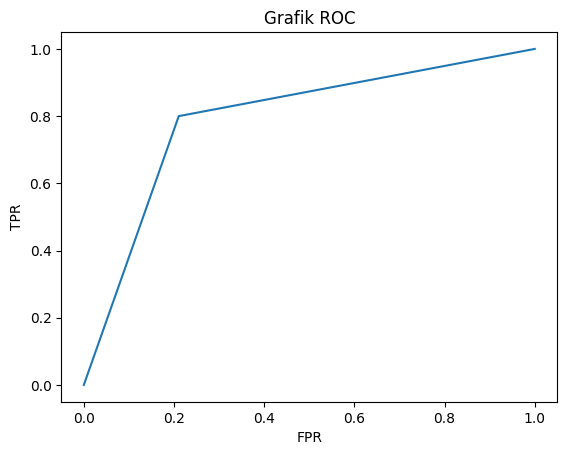

In [57]:
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predETC, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_predETC,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,y_predETC,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')